In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
sampleNo = 10;
# First group
mu0 = np.array([[-2, 2]])
Sigma0 = np.array([[2, 0], [0, 3]])
R0 = np.linalg.cholesky(Sigma0)
s0 = np.dot(np.random.randn(sampleNo, 2), R0) + mu0
# Second group
mu1 = np.array([[3, -2]])
Sigma1 = np.array([[1, 0], [0, 4]])
R1 = np.linalg.cholesky(Sigma1)
s1 = np.dot(np.random.randn(sampleNo, 2), R1) + mu1
print(s1)

[[ 3.78475896 -2.20458237]
 [ 3.83105235 -2.64079922]
 [ 1.28734547 -1.71669761]
 [ 3.12284612 -4.64077831]
 [ 4.34223124 -1.2788499 ]
 [ 3.40317359 -3.59201274]
 [ 3.00846719 -1.05626331]
 [ 3.09450104 -2.9326516 ]
 [ 2.29404836 -0.79057212]
 [ 4.35717137 -4.98226925]]


In [42]:
from pandas import DataFrame
if s0.shape[1] == 2:
    s0 = np.insert(s0, 2, values=1, axis=1) # Add a column of tag values
if s1.shape[1] == 2:
    s1 = np.insert(s1, 2, values=0, axis=1) # Add a column of tag values
s = np.concatenate((s0,s1),axis=0) # concatenate the two groups
df = DataFrame(s, columns=['x1','x2','y'])
df

,x1,x2,y
0,-3.748396,-1.392058,1.0
1,-2.214659,2.207990,1.0
2,-1.472770,-0.154833,1.0
3,-1.705069,-2.148175,1.0
4,-1.522969,2.087458,1.0
5,-2.946763,1.140504,1.0
6,-3.573192,0.489598,1.0
7,-1.818947,1.773597,1.0
8,-2.962066,-0.409019,1.0
9,-2.084418,-0.474627,1.0


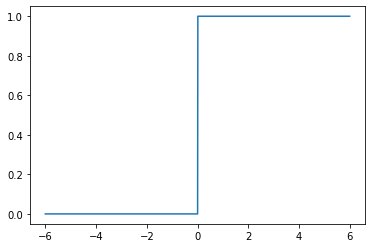

In [43]:
def sgn(z):
    return np.where(z>0,1,0)

x = np.arange(-6,6,0.01) 
plt.plot(x,sgn(x)) 
plt.show()

In [44]:
w1 = np.random.rand()
w2 = np.random.rand()
b = np.random.rand()
print("w1: %f, w2:%f, b:%f"%(w1,w2,b))

w1: 0.087595, w2:0.364029, b:0.676673


In [46]:
#calculate the loss

import math
sampleNo = 10;
loss = 0
for i in range(2*sampleNo):
    yhat = sgn(w1*s[i,0]+w2*s[i,1]+b)
    y = s[i,2]
    # print(yhat,y)
    loss += math.fabs(yhat-y)
print(loss)

9.0


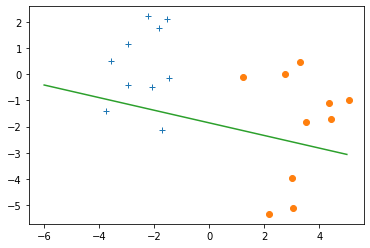

In [47]:
x1 = np.arange(-6,6) 
x2 = (-w1 * x1 -  b)/w2
plt.plot(s0[:,0],s0[:,1],'+')
plt.plot(s1[:,0],s1[:,1],'o')
plt.plot(x1,x2) 
plt.show()

In [48]:
#Continue sellecting randomly parameters

for j in range(10):
    w1 = np.random.rand()
    w2 = np.random.rand()
    b = np.random.rand()
    loss = 0
    for i in range(2*sampleNo):
        yhat = sgn(w1*s[i,0]+w2*s[i,1]+b)
        y = s[i,2]
        # print(yhat,y)
        loss += math.fabs(yhat-y)
    print("w1: %f, w2:%f, b:%f, loss:%f"%(w1,w2,b,loss))

w1: 0.119834, w2:0.143051, b:0.366427, loss:11.000000
w1: 0.603423, w2:0.082891, b:0.806537, loss:19.000000
w1: 0.947108, w2:0.690848, b:0.882815, loss:16.000000
w1: 0.868914, w2:0.604290, b:0.000564, loss:18.000000
w1: 0.151141, w2:0.705987, b:0.159297, loss:11.000000
w1: 0.112943, w2:0.479320, b:0.606856, loss:9.000000
w1: 0.917093, w2:0.953447, b:0.099393, loss:14.000000
w1: 0.257826, w2:0.480633, b:0.436270, loss:13.000000
w1: 0.376264, w2:0.426699, b:0.153510, loss:14.000000
w1: 0.361979, w2:0.131791, b:0.455136, loss:18.000000


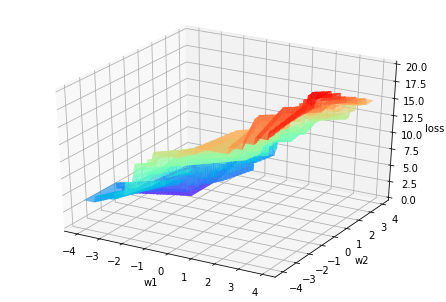

In [69]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = Axes3D(fig)
W1 = np.arange(-4, 4, 0.05)
W2 = np.arange(-4, 4, 0.05)
X, Y = np.meshgrid(W1, W2)
Z = np.zeros(X.shape)
width, height = X.shape
for i in range(height):
    for j in range(width):
        w1 = X[i,j]
        w2 = Y[i,j]
        b = 5
        loss = 0
        for k in range(2*sampleNo):
            yhat = sgn(w1*s[k,0]+w2*s[k,1]+b)
            y = s[k,2]
            # print(yhat,y)
            loss += math.fabs(yhat-y)
        Z[i,j] = loss
ax.plot_surface(X, Y, Z, cmap='rainbow', rstride=1, cstride=1, alpha=0.9, lw=1)
ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("loss")
#ax.set_zlim(0,40)
plt.show()

In [70]:
m = np.argmin(Z)
print("Min Loss:", Z.flatten()[m])
print("w1:%.2f,w2:%.2f"%(X.flatten()[m], Y.flatten()[m]))

Min Loss: 0.0
w1:-4.00,w2:1.15


In the above code if the updating value of b has a large impact on our min loss

w1: -4.00, w2:1.15, b:1.00, loss:0.00


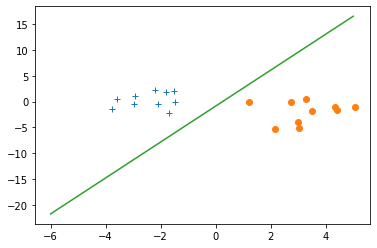

In [72]:
w1 = -4.00
w2 = 1.15
b = 1
loss = 0
for i in range(2*sampleNo):
    yhat = sgn(w1*s[i,0]+w2*s[i,1]+b)
    y = s[i,2]
    # print(yhat,y)
    loss += math.fabs(yhat-y)
print("w1: %.2f, w2:%.2f, b:%.2f, loss:%.2f"%(w1,w2,b,loss))
x1 = np.arange(-6,6) 
x2 = (-w1 * x1 -  b)/w2
plt.plot(s0[:,0],s0[:,1],'+')
plt.plot(s1[:,0],s1[:,1],'o')
plt.plot(x1,x2) 
plt.show()

As the above code result we can see that changing b value can help us classified our two datasets.